# TIP PREDICTION

### Main objective of the analysis

Using this dataset, an attempt was made to predict the approximate tip revenue that would be obtained from the next customer and the table they are seated at, based on previously received tip amounts and the conditions under which they were received

### Objectives


Our objectives are as follows:
* Cleaning the data or processing it with techniques such as one-hot encoding if necessary.
* Making the target variable normally distributed for statistical analyses and applying standard scaling to other independent variables.
* Splitting the resulting dataframe into training and test datasets for modeling.
* Training models using linear regression, ridge regression, lasso regression, and ElasticNet regression approaches on the split data.
* Comparing the performance of the models and selecting the most successful one.




## Data Preparation and Importing Necessary Libraries

In this section, we import essential libraries for data manipulation, visualization, and statistical analysis.
Libraries include pandas and numpy for data handling, matplotlib and seaborn for visualization, and scikit-learn for machine learning algorithms. Additionally, we import statistical tests and functions from scipy for data transformation and distribution testing

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats.mstats import normaltest # D'Agostino K^2 Test
from scipy.stats import boxcox
from scipy.special import inv_boxcox

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import r2_score


## Data Loading and Preprocessing

In this section, we load the dataset and perform preprocessing tasks.
We convert categorical variables ('sex', 'smoker', 'time', 'day') into dummy/indicator variables using one-hot encoding.
Additionally, boolean values (True/False) are replaced with binary values (1/0).


In [3]:
df = pd.read_csv('tips.csv')
df



,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### Brief description of the data set

The dataset includes the total bill amount of the table, the tip given, the gender of the waiter, whether the table is in a smoking environment or not, the day of the week, whether the meal is dinner or lunch, and the number of people at the table
* total_bill = Total bill
* tip = the tip given
* sex = the gender of the payer
* smoker = whether the table is in a smoking environment or not
* day = the day of the week
* time = whether the meal is dinner or lunch
* size = the number of people at the table

In [4]:
df = pd.get_dummies(df, columns=['sex'], drop_first=True)
df = pd.get_dummies(df, columns=['smoker'], drop_first=True)
df = pd.get_dummies(df, columns=['time'], drop_first=True)
df = pd.get_dummies(df, columns=['day'])

df = df.replace({True: 1, False: 0})
df

C:\Users\lenovo\AppData\Local\Temp\ipykernel_35692\410364793.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({True: 1, False: 0})


,total_bill,tip,size,sex_Male,smoker_Yes,time_Lunch,day_Fri,day_Sat,day_Sun,day_Thur
0,16.99,1.01,2,0,0,0,0,0,1,0
1,10.34,1.66,3,1,0,0,0,0,1,0
2,21.01,3.50,3,1,0,0,0,0,1,0
3,23.68,3.31,2,1,0,0,0,0,1,0
4,24.59,3.61,4,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,1,0,0,0,1,0,0
240,27.18,2.00,2,0,1,0,0,1,0,0
241,22.67,2.00,2,1,1,0,0,1,0,0
242,17.82,1.75,2,1,0,0,0,1,0,0


## Exploratory Data Analysis (EDA) and Visualizations

In this section, we perform exploratory data analysis using visualizations.
We use pairplots and heatmaps to explore the relationships and correlations between different features.
Additionally, we use boxplots to examine the distribution of tips with respect to various categorical variables.


#### Pairplot to visualize relationships between variables


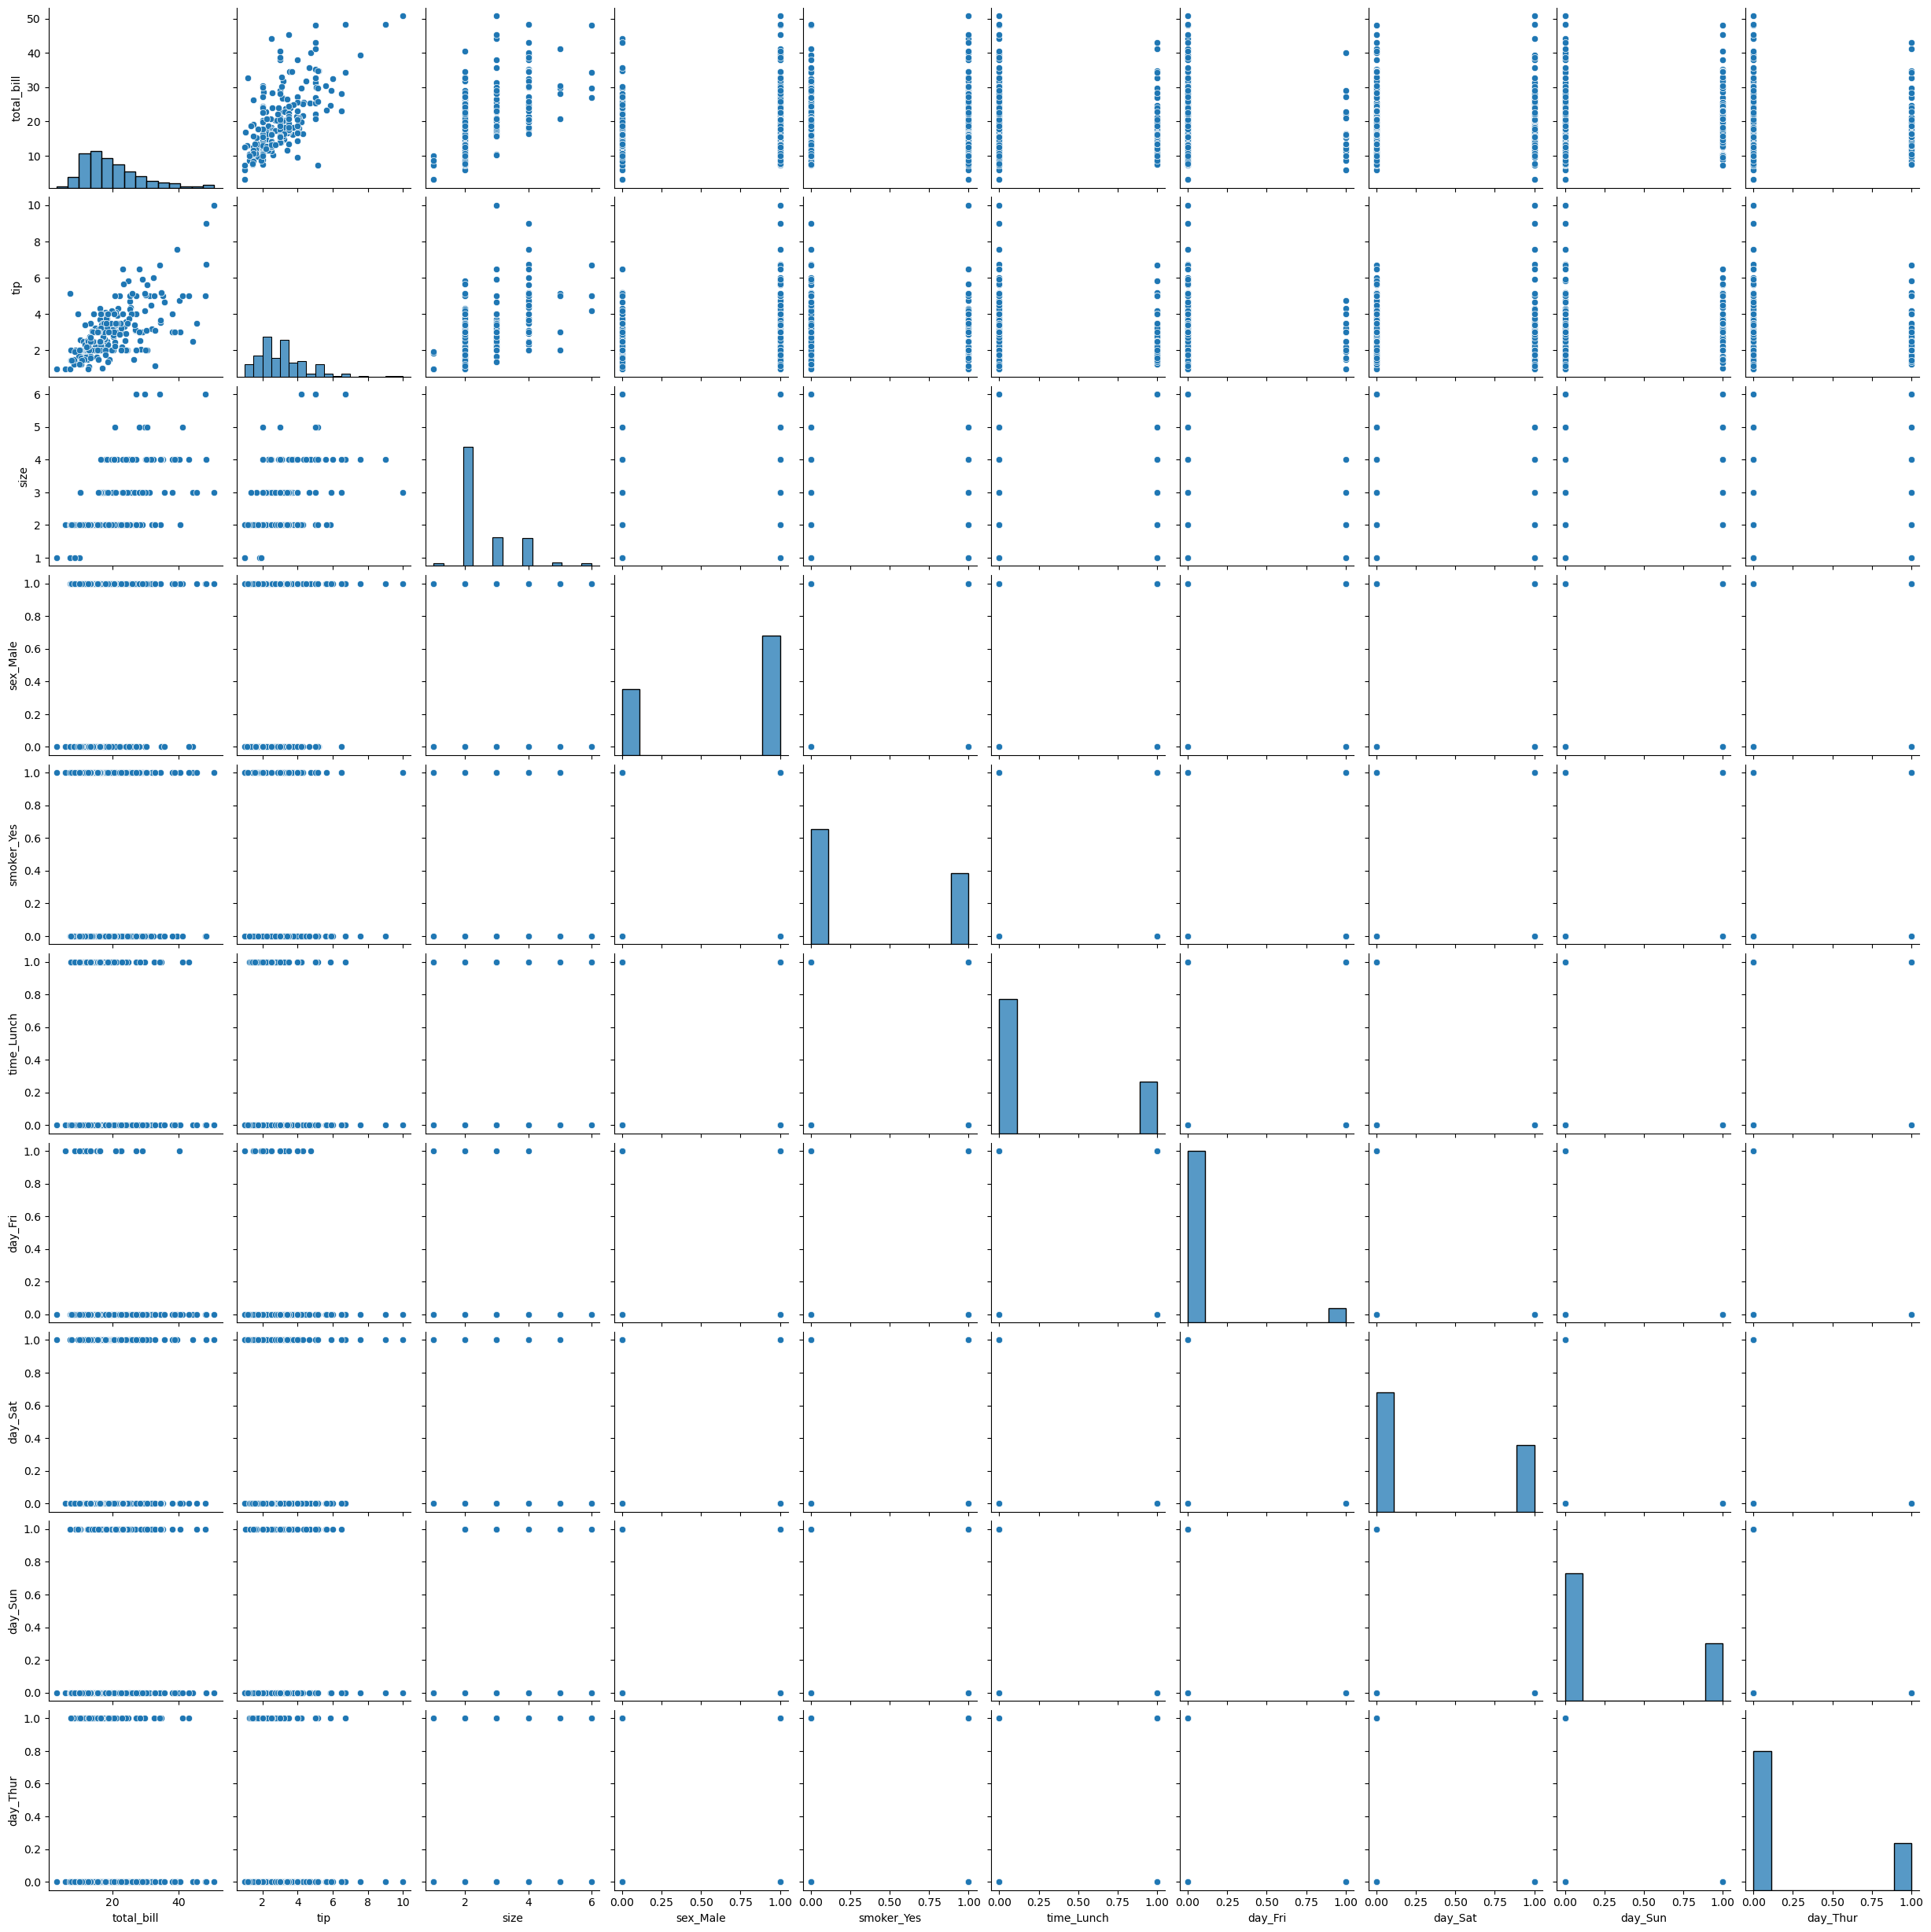

In [5]:
sns.pairplot(df)
plt.show()



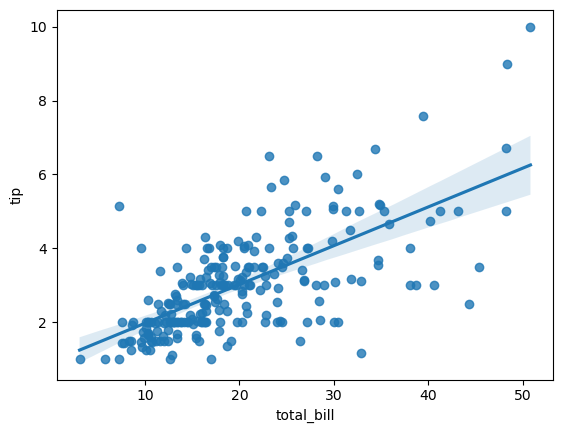

In [6]:
sns.regplot(x='total_bill', y='tip', data=df)
plt.show()


#### Heatmap to display the correlation matrix


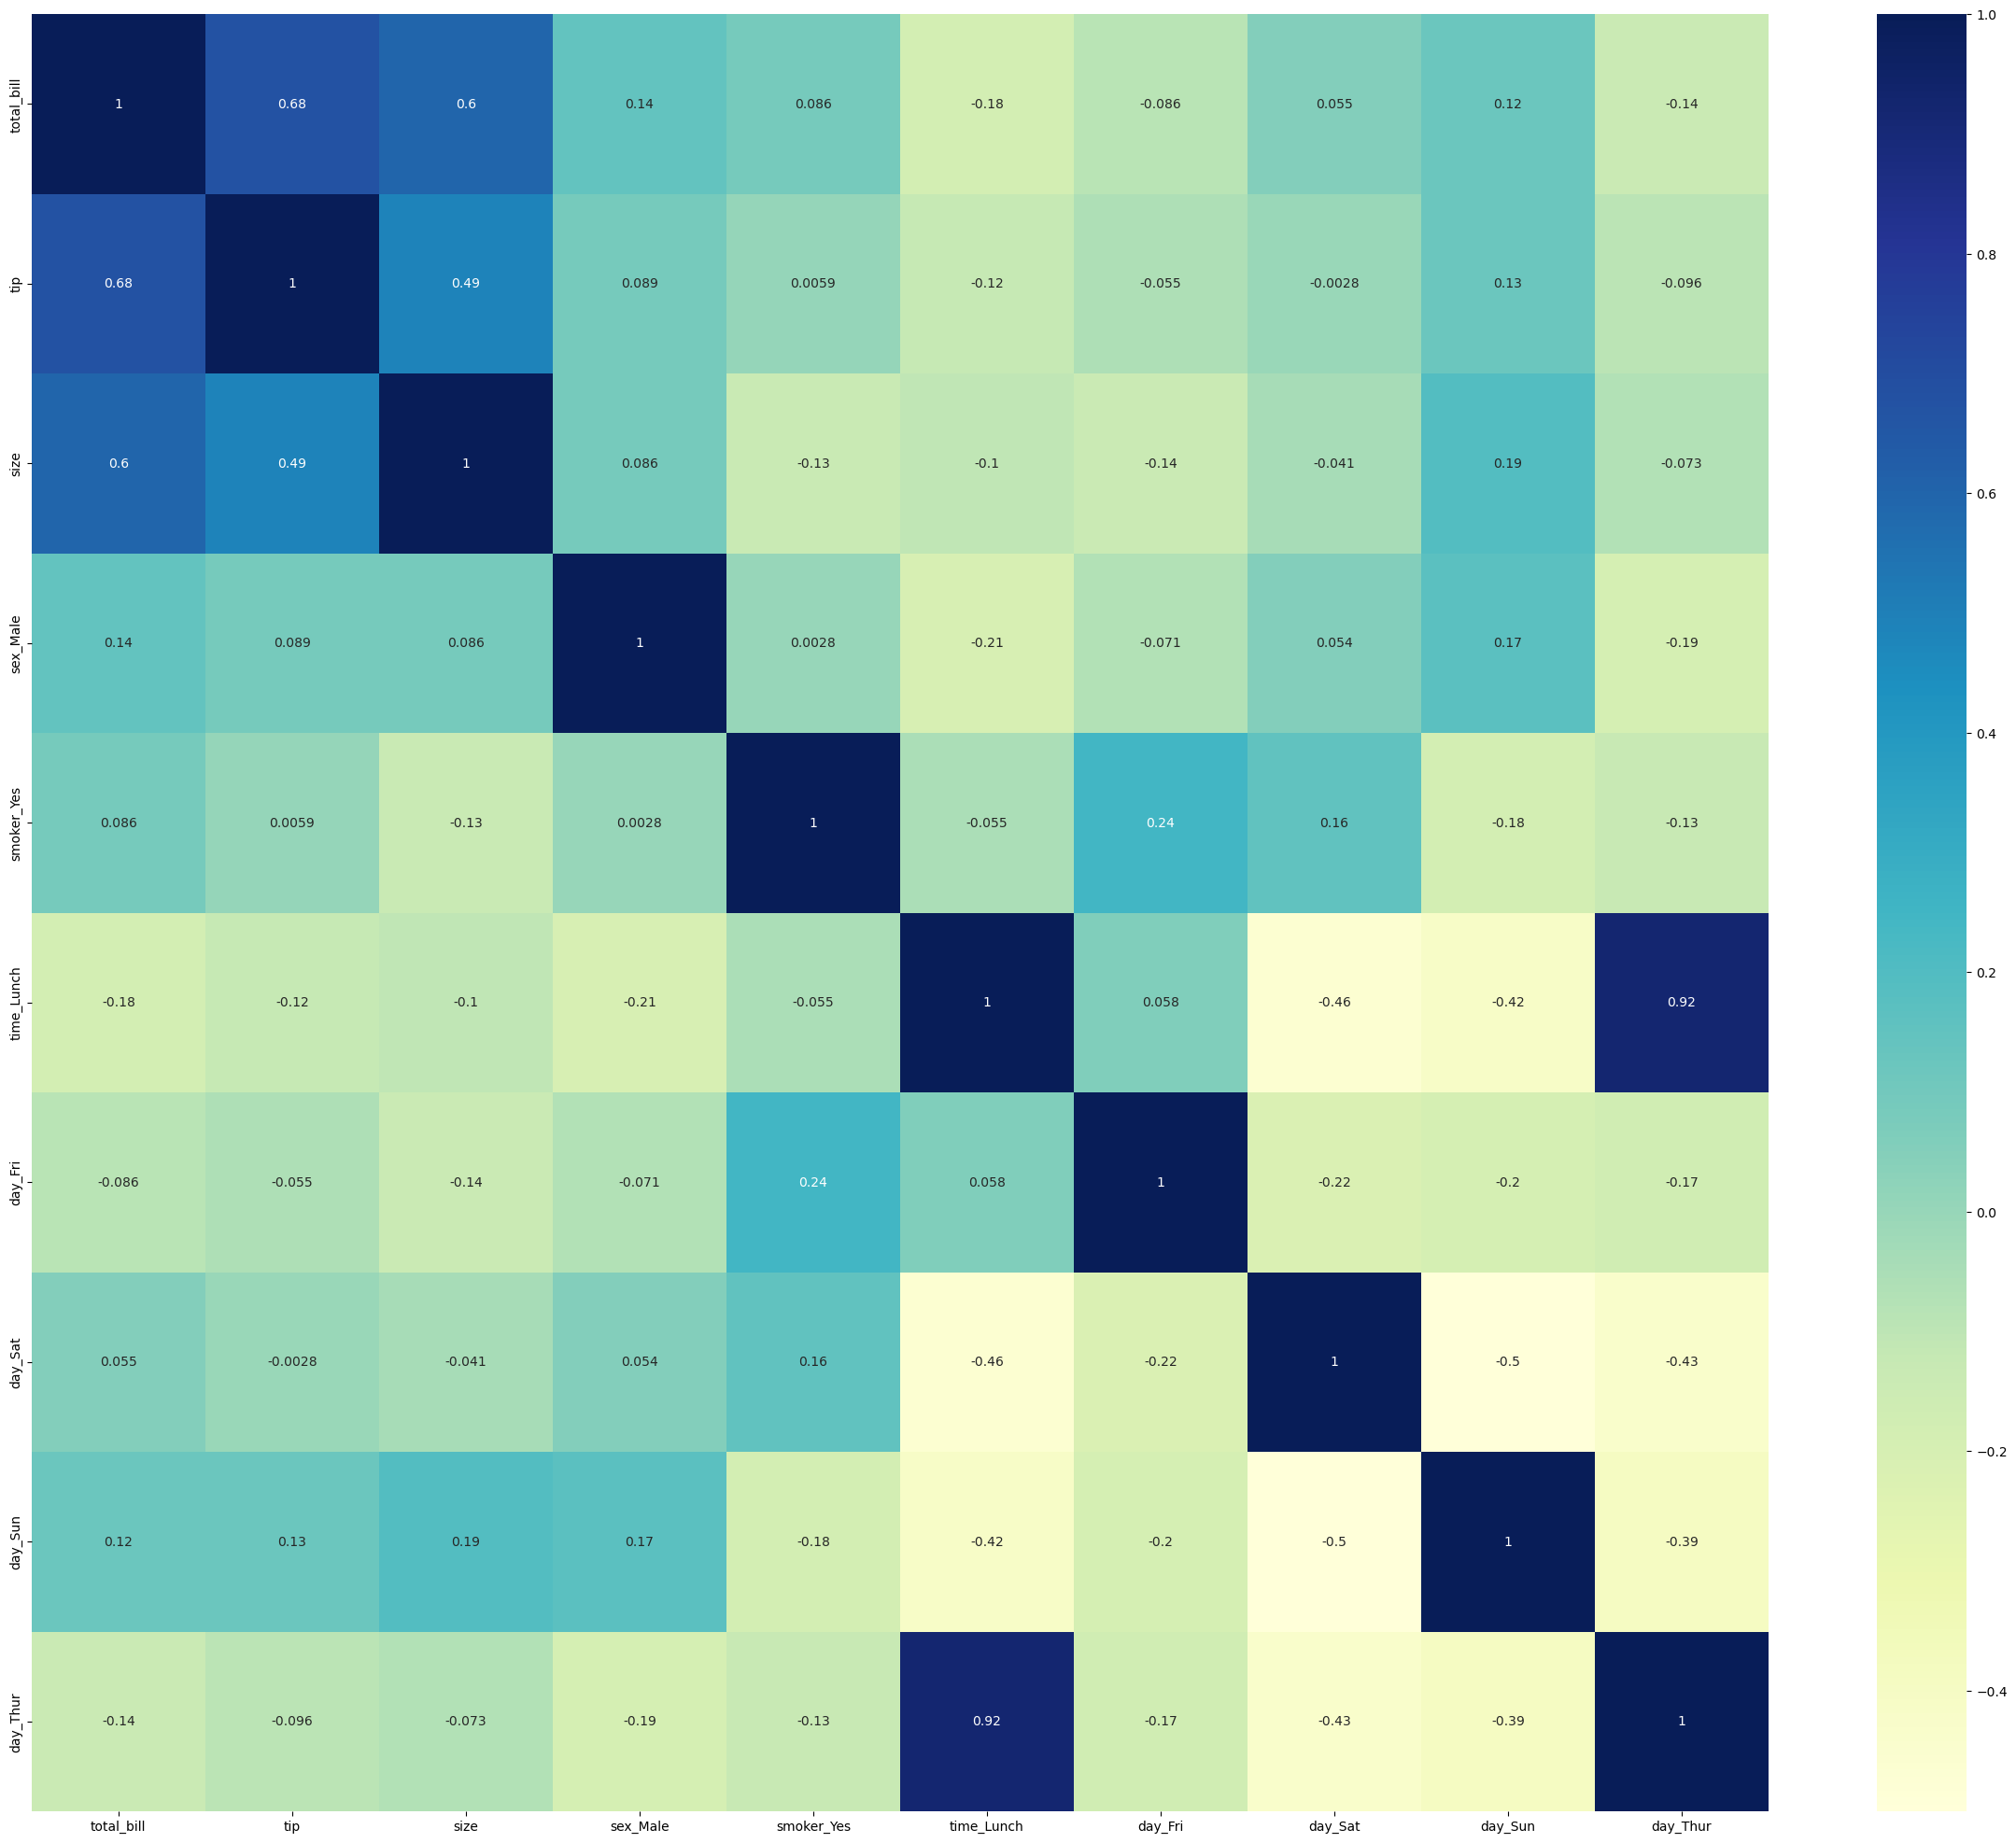

In [7]:
plt.figure(figsize = (30, 25))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()


#### Boxplots to visualize the distribution of tips based on different categorical features


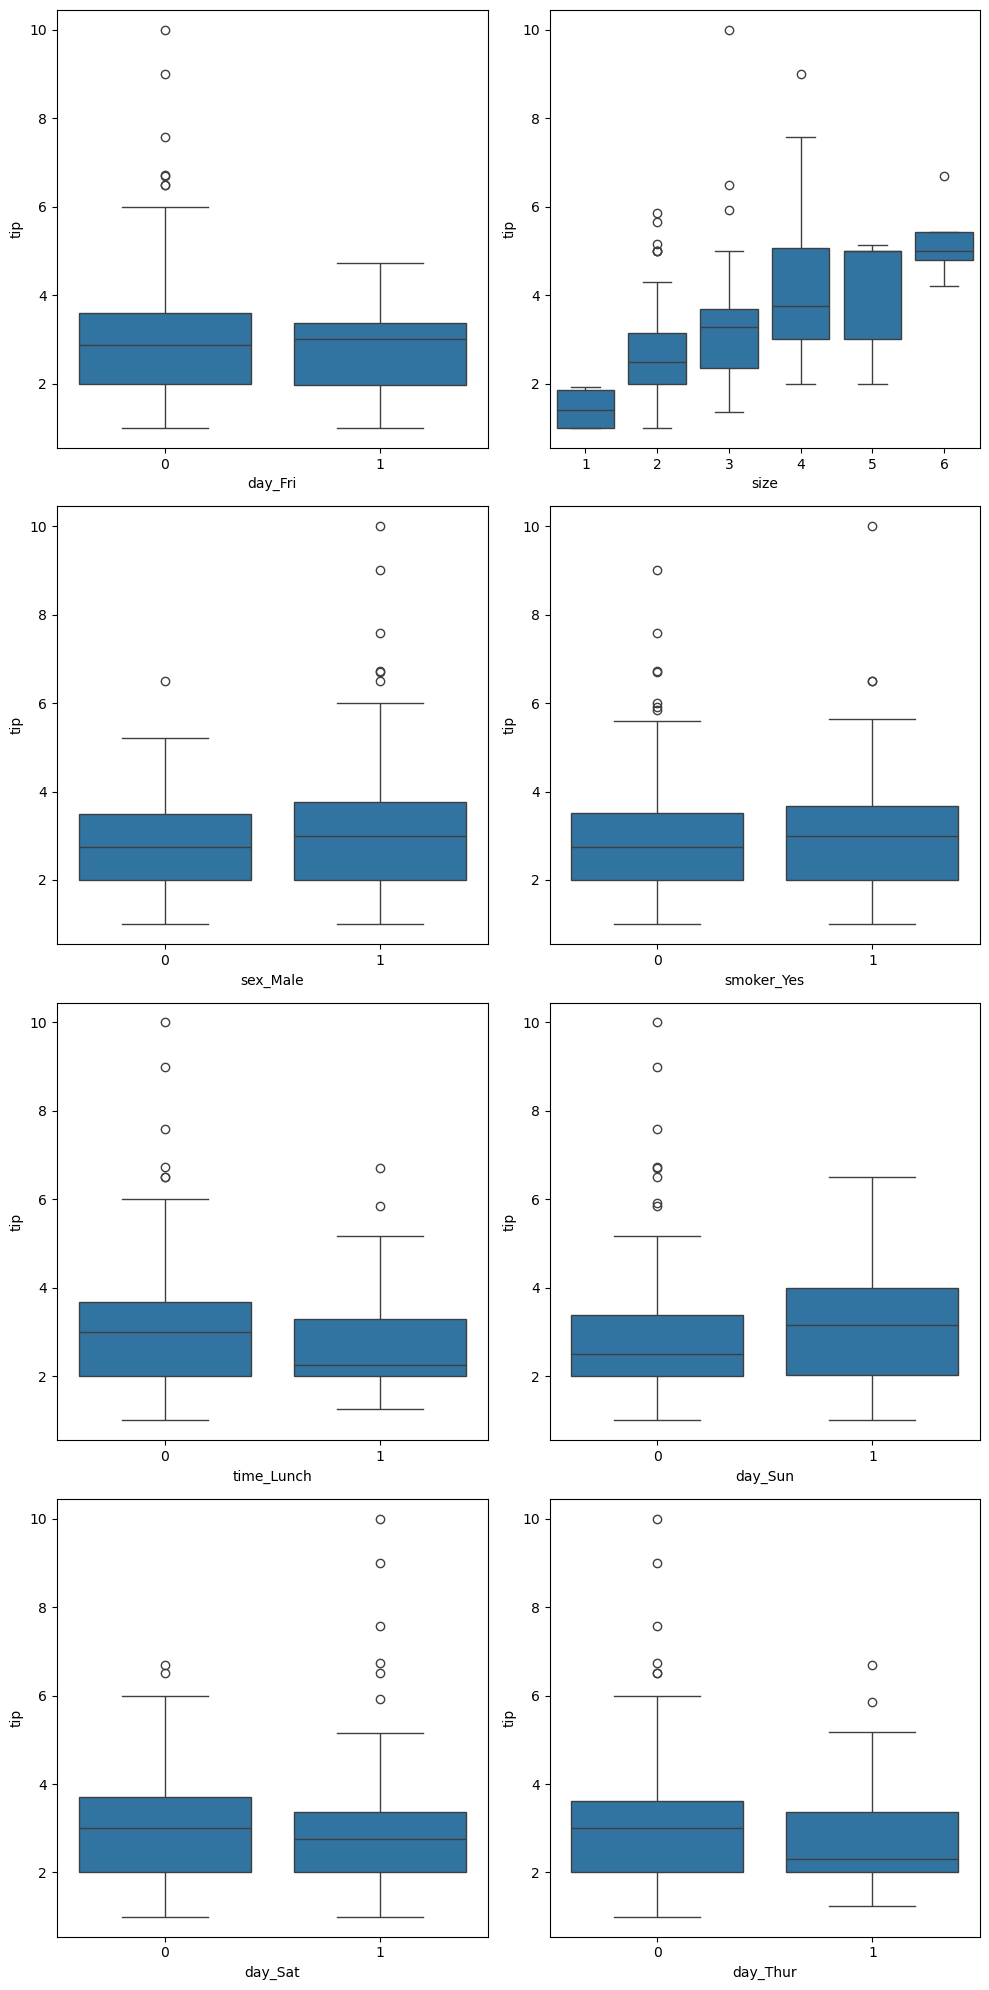

In [8]:

plt.figure(figsize=(10, 20))

plt.subplot(4,2,1)
sns.boxplot(x = 'day_Fri', y = 'tip', data = df)

plt.subplot(4,2,2)
sns.boxplot(x = 'size', y = 'tip', data = df)

plt.subplot(4,2,3)
sns.boxplot(x = 'sex_Male', y = 'tip', data = df)

plt.subplot(4,2,4)
sns.boxplot(x = 'smoker_Yes', y = 'tip', data = df)

plt.subplot(4,2,5)
sns.boxplot(x = 'time_Lunch', y = 'tip', data = df)

plt.subplot(4,2,6)
sns.boxplot(x = 'day_Sun', y = 'tip', data = df)

plt.subplot(4,2,7)
sns.boxplot(x = 'day_Sat', y = 'tip', data = df)

plt.subplot(4,2,8)
sns.boxplot(x = 'day_Thur', y = 'tip', data = df)

plt.tight_layout()
plt.show()


## Feature Analysis and Data Transformation

In this section, we create custom visualizations to explore the distribution and normality of the 'tip' feature.
We use a combination of a histogram, QQ-plot, and box plot to analyze the feature.
Afterward, we apply the Box-Cox transformation to make the data more normally distributed and visualize the transformed data.

#### Function to create three types of visualizations: Histogram, QQ-plot, and Box plot


In [9]:
def plotting_3_chart(data, feature):
    ## Importing seaborn, matplotlib and scipy modules.
    import seaborn as sns
    import matplotlib.pyplot as plt
    import matplotlib.gridspec as gridspec
    from scipy import stats
    import matplotlib.style as style
    style.use('fivethirtyeight')

    ## Creating a customized chart layout with a grid of 3 columns and 3 rows
    fig = plt.figure(constrained_layout=True, figsize=(12, 8))
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)

    ## Plotting the histogram
    ax1 = fig.add_subplot(grid[0, :2])
    ax1.set_title('Histogram')
    sns.distplot(data.loc[:, feature], norm_hist=True, ax=ax1)

    ## Plotting the QQ-plot to check normality
    ax2 = fig.add_subplot(grid[1, :2])
    ax2.set_title('QQ_plot')
    stats.probplot(data.loc[:, feature], plot=ax2)

    ## Plotting the box plot to detect outliers
    ax3 = fig.add_subplot(grid[:, 2])
    ax3.set_title('Box Plot')
    sns.boxplot(data.loc[:, feature], orient='v', ax=ax3)



#### Calling the function to visualize the 'tip' feature


C:\Users\lenovo\AppData\Local\Temp\ipykernel_35692\816148140.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.loc[:, feature], norm_hist=True, ax=ax1)


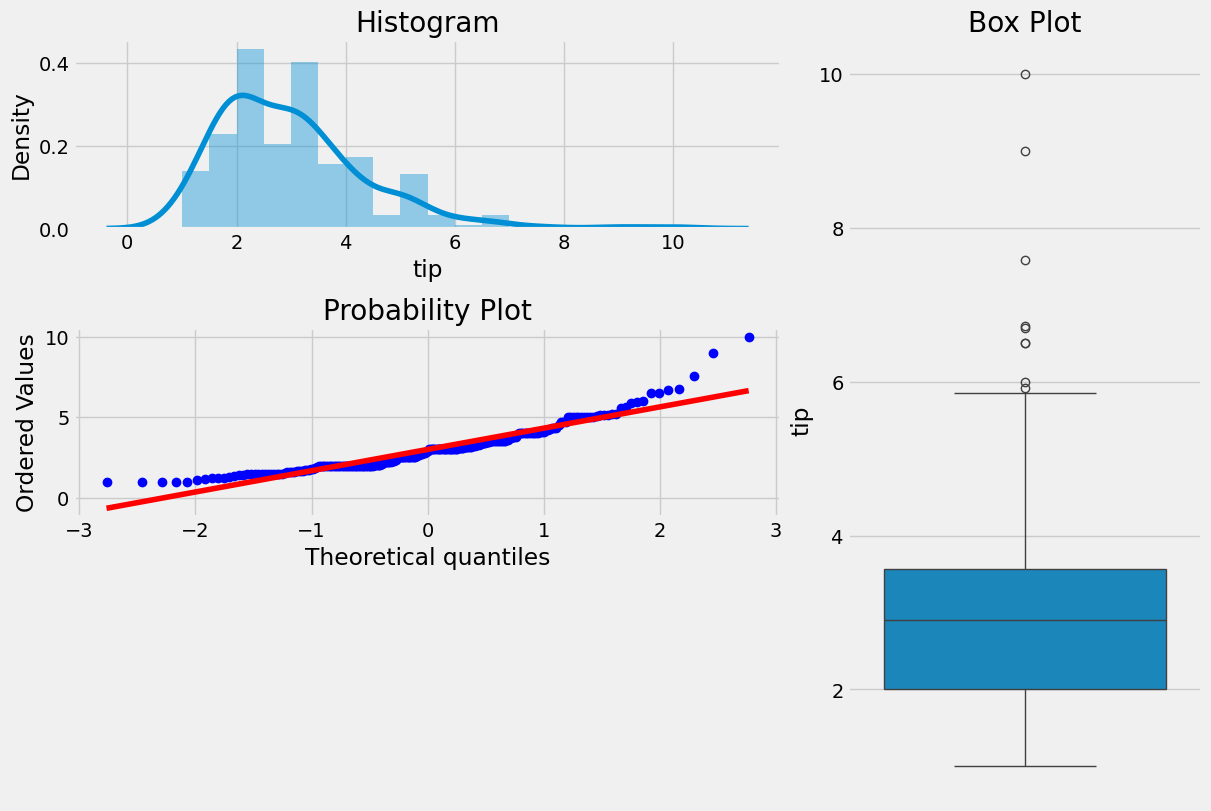

In [10]:
plotting_3_chart(df, 'tip')


#### Performing normality test before transformation


In [11]:
normaltest(df.tip.values)


NormaltestResult(statistic=79.37862574074785, pvalue=5.796294322907102e-18)

The normality test (D'Agostino and Pearson's test) was conducted to determine if the 'tip' feature follows a normal distribution. The test returns two values: a test statistic and a p-value.
In this case, the test statistic is 79.38 and the p-value is extremely small (5.80e-18).
Since the p-value is much smaller than the typical significance level (0.05), we reject the null hypothesis that the data follows a normal distribution. This indicates that the 'tip' feature does not follow a normal distribution

#### Applying Box-Cox transformation to the 'tip' feature


In [12]:
boxcox_transformed, optimal_lambda = boxcox(df.tip)
print(f"Optimal Lambda Value: {optimal_lambda}")


Optimal Lambda Value: -0.06325976445988409


#### Visualizing the transformed data


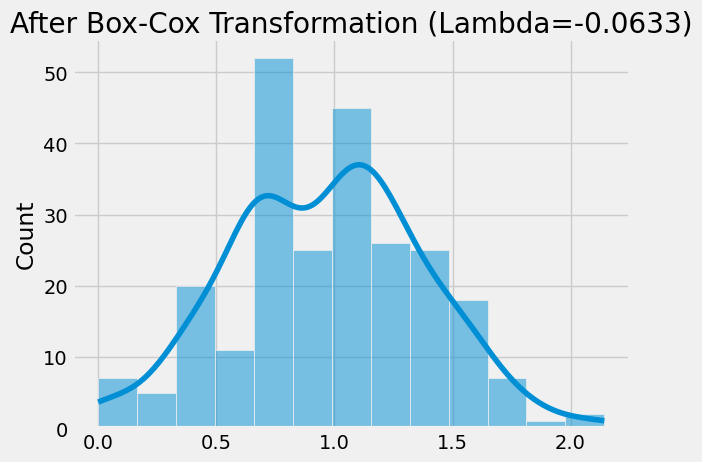

In [13]:
sns.histplot(boxcox_transformed, kde=True)
plt.title(f"After Box-Cox Transformation (Lambda={optimal_lambda:.4f})")
plt.show()


#### Performing normality test after transformation


In [14]:
normaltest(boxcox_transformed)


NormaltestResult(statistic=0.37265926809447936, pvalue=0.829999953639732)

After applying the Box-Cox transformation, we conducted another normality test to check if the 'tip' feature now follows a normal distribution. The test returns a statistic of 0.37 and a p-value of 0.83.
Since the p-value (0.83) is much larger than the significance level (0.05), we fail to reject the null hypothesis.
This suggests that after the Box-Cox transformation, the 'tip' feature follows a normal distribution.


#### Updating the 'tip' column with the transformed values


In [15]:

df["tip"] = boxcox_transformed


C:\Users\lenovo\AppData\Local\Temp\ipykernel_35692\816148140.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.loc[:, feature], norm_hist=True, ax=ax1)


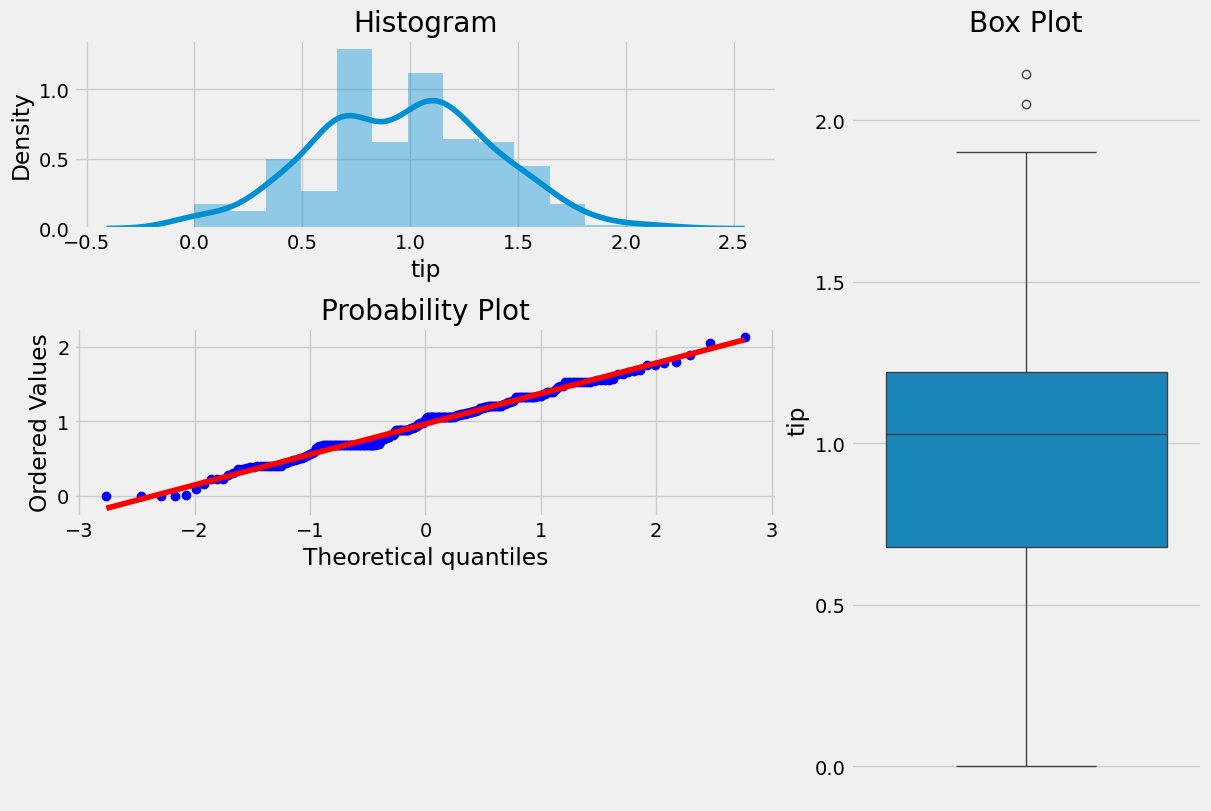

In [16]:
plotting_3_chart(df, 'tip')

## Model Training, Performance Evaluation, and Visualization


In this section, we train and evaluate multiple regression models (Linear Regression, Ridge, Lasso, and ElasticNet) to predict the tip amount. We calculate performance metrics such as RMSE, MSE, MAE, and R² for each model to compare their effectiveness. Additionally, we create scatter plots to visualize the predicted vs actual values and residual errors for the Ridge regression model.

This comprehensive approach allows us to select the best model for tip prediction based on both quantitative metrics and visual inspection of residuals.









#### Data Preprocessing and Train-Test Split


This section defines the target variable (tip) and independent variables. The features are standardized using StandardScaler, and the dataset is split into training and testing sets (70% training, 30% testing)

In [17]:
y_col = "tip"
X = df.drop(y_col, axis=1)
y = df[y_col]

s = StandardScaler()
X_ss = s.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_ss, y, test_size=0.3, random_state=72018)


#### Model Training: Linear Regression

Here, a linear regression model is trained on the training data and predictions are made on the test set. The model's performance is evaluated using Root Mean Squared Error (RMSE).



In [18]:
lr = LinearRegression()
lr.fit(X_train, y_train)
Y_pred_linear = lr.predict(X_test)
rmse_linear = np.sqrt(mean_squared_error(y_test, Y_pred_linear))
print(f"RMSE for Linear Regression: {rmse_linear}")


RMSE for Linear Regression: 0.32216255876722877


## Ridge, Lasso, and ElasticNet Regression

Explanation: This section trains Ridge, Lasso, and ElasticNet regression models using cross-validation to find the best hyperparameters (alpha for Ridge and Lasso, and alpha and l1_ratio for ElasticNet). These models help mitigate overfitting.



In [19]:
ridgeCV = RidgeCV(alphas=[0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 80], cv=4).fit(X_train, y_train)
lassoCV = LassoCV(alphas=np.array([1e-5, 5e-5, 0.0001, 0.0005]), max_iter=50000, cv=3).fit(X_train, y_train)
elasticNetCV = ElasticNetCV(alphas=np.array([1e-5, 5e-5]), l1_ratio=np.linspace(0.1, 0.9, 9), max_iter=50000).fit(X_train, y_train)


In [20]:
def rmse(ytrue, ypredicted):
    return np.sqrt(mean_squared_error(ytrue, ypredicted))

In [21]:
ridgeCV_rmse = rmse(y_test, ridgeCV.predict(X_test))
print(ridgeCV.alpha_, ridgeCV_rmse)  # Lasso is slower

print('Of {} coefficients, {} are non-zero with Ridge.'.format(len(ridgeCV.coef_), 
                                                               len(ridgeCV.coef_.nonzero()[0])))
ridgeCV.coef_


15.0 0.31429525751712767
Of 9 coefficients, 9 are non-zero with Ridge.


array([ 0.24154327,  0.01922317, -0.01681834,  0.00651913, -0.0084009 ,
        0.00280828, -0.0134601 ,  0.01920058, -0.00734367])

In [22]:
column_names = ['total_bill', 'size', 'sex_Male', 'smoker_Yes', 'time_Lunch', 
                 'day_Fri', 'day_Sat', 'day_Sun', 'day_Thur']

coef_df = pd.DataFrame({
    'Feature': column_names,
    'Coefficient': ridgeCV.coef_
})

non_zero_coefs = coef_df[coef_df['Coefficient'] != 0]

non_zero_coefs


,Feature,Coefficient
0,total_bill,0.241543
1,size,0.019223
2,sex_Male,-0.016818
3,smoker_Yes,0.006519
4,time_Lunch,-0.008401
5,day_Fri,0.002808
6,day_Sat,-0.013460
7,day_Sun,0.019201
8,day_Thur,-0.007344


In [23]:
lassoCV_rmse = rmse(y_test, lassoCV.predict(X_test))
print(lassoCV.alpha_, lassoCV_rmse)  # Lasso is slower
print('Of {} coefficients, {} are non-zero with Lasso.'.format(len(lassoCV.coef_), 
                                                               len(lassoCV.coef_.nonzero()[0])))
lassoCV.coef_



0.0005 0.3214961821985124
Of 9 coefficients, 7 are non-zero with Lasso.


array([ 2.73962041e-01, -2.44313965e-05, -1.97338949e-02,  2.58903670e-03,
       -0.00000000e+00,  1.04220994e-02, -0.00000000e+00,  3.57733881e-02,
       -3.34917343e-04])

One of the key features of Lasso regression is its ability to reduce the number of non-zero coefficients. Here, out of 9 total coefficients, only 7 are non-zero. This demonstrates Lasso's effectiveness in eliminating less important features, which helps in simplifying the model and potentially improving its interpretability. By setting some coefficients to zero, Lasso not only helps in reducing model complexity but also in focusing on the most significant predictors

In [24]:
column_names = ['total_bill', 'size', 'sex_Male', 'smoker_Yes', 'time_Lunch', 
                 'day_Fri', 'day_Sat', 'day_Sun', 'day_Thur']

coef_df = pd.DataFrame({
    'Feature': column_names,
    'Coefficient': lassoCV.coef_
})

non_zero_coefs = coef_df[coef_df['Coefficient'] != 0]

non_zero_coefs

,Feature,Coefficient
0,total_bill,0.273962
1,size,-0.000024
2,sex_Male,-0.019734
3,smoker_Yes,0.002589
5,day_Fri,0.010422
7,day_Sun,0.035773
8,day_Thur,-0.000335


In [25]:
elasticNetCV_rmse = rmse(y_test, elasticNetCV.predict(X_test))
print(elasticNetCV.alpha_, elasticNetCV.l1_ratio_, elasticNetCV_rmse)
elasticNetCV.coef_


5e-05 0.9 0.32210072888505925


array([ 0.2751707 , -0.00122875, -0.02037526,  0.00281863, -0.        ,
        0.01081654, -0.        ,  0.03650325, -0.00056136])

In [38]:
column_names = ['total_bill', 'size', 'sex_Male', 'smoker_Yes', 'time_Lunch', 
                 'day_Fri', 'day_Sat', 'day_Sun', 'day_Thur']

coef_df = pd.DataFrame({
    'Feature': column_names,
    'Coefficient': elasticNetCV.coef_
})

non_zero_coefs = coef_df[coef_df['Coefficient'] != 0]

non_zero_coefs

,Feature,Coefficient
0,total_bill,0.275171
1,size,-0.001229
2,sex_Male,-0.020375
3,smoker_Yes,0.002819
5,day_Fri,0.010817
7,day_Sun,0.036503
8,day_Thur,-0.000561


## Model Predictions 

In [37]:
y_pred_linear = lr.predict(X_test)
y_pred_ridge = ridgeCV.predict(X_test)
y_pred_lasso = lassoCV.predict(X_test)
y_pred_elasticNet = elasticNetCV.predict(X_test)



This section generates predictions using different regression models: Linear Regression, Ridge Regression, Lasso Regression, and Elastic Net Regression. Each model makes predictions on the test dataset X_test.


## Performance Metrics Calculation

In [28]:
# Performans metriklerini hesaplayın
rmse_linear = np.sqrt(mean_squared_error(y_test, y_pred_linear))
mse_linear = mean_squared_error(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

rmse_elasticNet = np.sqrt(mean_squared_error(y_test, y_pred_elasticNet))
mse_elasticNet = mean_squared_error(y_test, y_pred_elasticNet)
mae_elasticNet = mean_absolute_error(y_test, y_pred_elasticNet)
r2_elasticNet = r2_score(y_test, y_pred_elasticNet)


This section calculates various performance metrics for each regression model:
* RMSE (Root Mean Squared Error): Measures the average magnitude of errors between predicted and actual values.
* MSE (Mean Squared Error): Represents the average of the squared differences between predicted and actual values.
* MAE (Mean Absolute Error): Indicates the average absolute difference between predicted and actual values.
* R² Score: Shows the proportion of variance in the dependent variable that is predictable from the independent variables.

Each of these metrics is computed for the Linear Regression, Ridge Regression, Lasso Regression, and Elastic Net models to evaluate their performance on the test data.



##  Model Performance Evaluation


In [30]:
metrics = {'RMSE': [rmse_linear, rmse_ridge, rmse_lasso, rmse_elasticNet],
           'MSE': [mse_linear, mse_ridge, mse_lasso, mse_elasticNet],
           'MAE': [mae_linear, mae_ridge, mae_lasso, mae_elasticNet],
           'R²': [r2_linear, r2_ridge, r2_lasso, r2_elasticNet]}

metrics_df = pd.DataFrame(metrics, index=['Linear', 'Ridge', 'Lasso', 'ElasticNet'])
metrics_df


,RMSE,MSE,MAE,R²
Linear,0.322163,0.103789,0.240145,0.293407
Ridge,0.314295,0.098782,0.238567,0.327496
Lasso,0.321496,0.103360,0.239901,0.296327
ElasticNet,0.322101,0.103749,0.240123,0.293678


## Residual Analysis and Scatter Plots


This section visualizes the performance of the Ridge regression model by plotting actual vs. predicted values and the residuals. These scatter plots help in assessing the model's fit and identifying patterns in the residuals

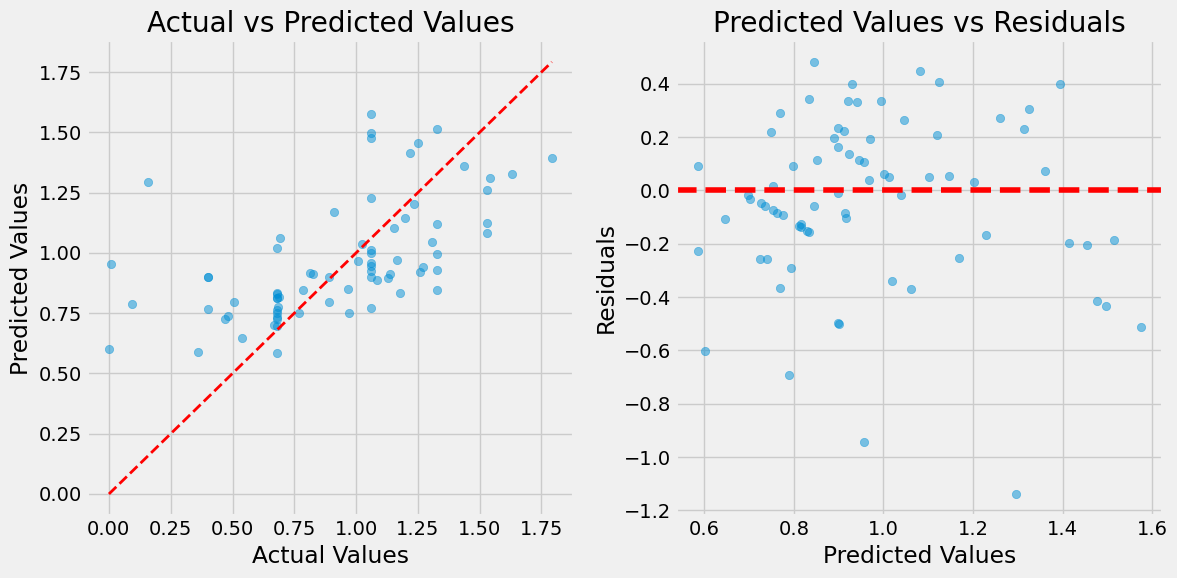

In [31]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_ridge, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')

plt.subplot(1, 2, 2)
residuals = y_test - y_pred_ridge
plt.scatter(y_pred_ridge, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Predicted Values vs Residuals')

plt.tight_layout()
plt.show()


## Insights and key findings

In the heat map in cell 7, it was observed that many variables have a significant impact on the tip amount. However, by utilizing the Lasso regression's ability to remove unnecessary parameters, we can see from the Coefficient values of the resulting prediction model that many variables have values approaching zero. This helps us identify which variables contribute more significantly. These variables and their Coefficient values can be seen in the table below

In [33]:
column_names = ['total_bill', 'size', 'sex_Male', 'smoker_Yes', 'time_Lunch', 
                 'day_Fri', 'day_Sat', 'day_Sun', 'day_Thur']

coef_df = pd.DataFrame({
    'Feature': column_names,
    'Coefficient': lassoCV.coef_
})

non_zero_coefs = coef_df[coef_df['Coefficient'] != 0]

non_zero_coefs

,Feature,Coefficient
0,total_bill,0.273962
1,size,-0.000024
2,sex_Male,-0.019734
3,smoker_Yes,0.002589
5,day_Fri,0.010422
7,day_Sun,0.035773
8,day_Thur,-0.000335


Additionally, the relationship between the actual values and the predicted values of the most successful model can be seen in the 'predicted value vs. residual value' graph below

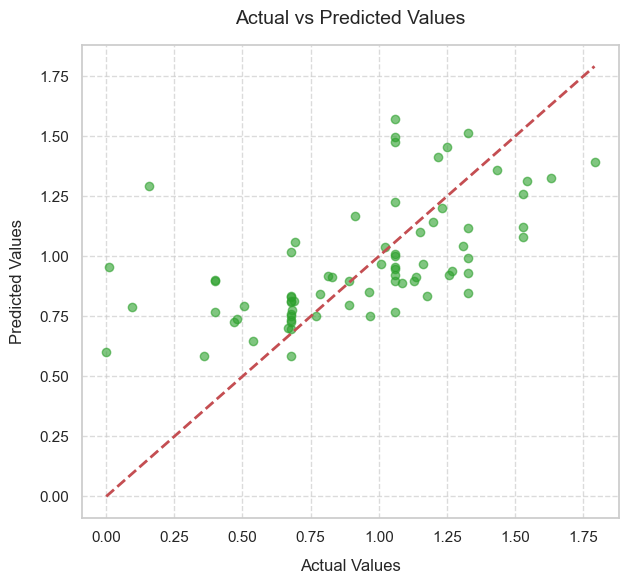

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")  # Seaborn ile beyaz gridli stil

plt.figure(figsize=(12, 6))

# Birinci plot (Actual vs Predicted)
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_ridge, alpha=0.6, color='#2ca02c')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values', fontsize=12, labelpad=10)
plt.ylabel('Predicted Values', fontsize=12, labelpad=10)
plt.title('Actual vs Predicted Values', fontsize=14, pad=15)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


## Next Steps


To improve the models, several approaches can be considered. These include
* Increasing the Data Size: The dataset used for training the model contained approximately 200 different inputs. Prioritizing the increase of the amount of data is essential. However, it is important to ensure that the data remains clean, adhering to the 'garbage in, garbage out' principle.
* Using Deep Learning Approaches: Another approach is to experiment with deep learning techniques. Although these methods may have significantly higher computational costs, they can potentially yield more accurate results for specific types of data

